In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
test_image.shape

(10000, 28, 28)

In [6]:
train_label[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

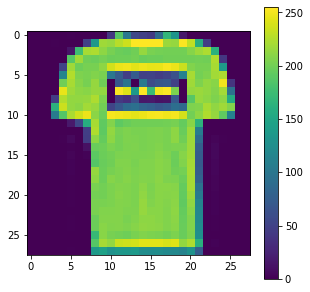

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(train_image[1])
plt.colorbar()
plt.grid(False)

In [0]:
train_image = train_image/255                       #Turning pixel values from 0 to 255 into 0 to 1
test_image = test_image/255

Building the model

In [0]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),            #input layer
                          keras.layers.Dense(128, activation='relu'),              #hidden layer
                          keras.layers.Dense(10, activation='softmax')])           #output layer

Compiling model

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

Evaluation

In [32]:
model.fit(train_image,train_label, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1485 - accuracy: 0.9439
Epoch 2/2
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1472 - accuracy: 0.9438


In [33]:
test_loss, test_acc = model.evaluate(test_image, test_label, verbose=1)
print('test_accuracy = ', test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3993 - accuracy: 0.8829
test_accuracy =  0.8829


In [0]:
prediction = model.predict(test_image)

In [19]:
prediction[1]              #Here we got probablity distributation for our test image 1.So one having maximum probability will be our label 

array([5.5278077e-05, 8.8716186e-19, 9.9934202e-01, 2.5018897e-17,
       6.0173613e-04, 1.0315883e-14, 9.1575066e-07, 1.6258608e-20,
       2.6492874e-15, 2.3095576e-17], dtype=float32)

In [21]:
print(np.argmax(prediction[1]))   #So it is the second item of our class names having maximum probability

2


Predict:  Pullover


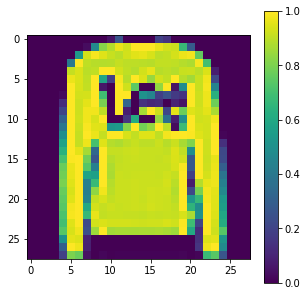

In [35]:
print('Predict: ',class_names[(np.argmax(prediction[1]))])
plt.figure(figsize=(5,5))
plt.imshow(test_image[1])
plt.colorbar()
plt.grid(False)
